## This notebook contains: 
### 01. Import libraries and check data
### 02. Density scatterplots: Living space and total rent
  #### 02a. Rent and size for big city cluster
  #### 02b. Rent and size for budget cluster
  #### 02c. Rent and size for upscale cluster
  #### 02d. Rent and size for midhigh cluster
  #### 02e. Rent and size for midlow cluster
### 03. District population growth and rent
### 04. District population growth and median rent (aggregated)
### 05. Using density scatters to analyze other potential correlations
  #### 05a. Year and unit price
  #### 05b. Year and total rent
  #### 05c. Picturecount and unit price
  #### 05d. Picturecount and totalRent

### Note: I'm using density scatterplots to better visualize relationships in this large and highly variable dataset. Density scatterplots use brighter colors to indicate regions with more data points.

# 01. Import libraries and check data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
path = r'C:\Users\jacym\Desktop\Career Foundry projects\german rent'

In [4]:
# import rent data
df = pd.read_csv(os.path.join(path, '02 data', 'cleaned data', 'clustered_data.csv'), index_col = False)

In [5]:
df.head()

,totalRent,price/unit,livingSpace,picturecount,yearConstructed,noRooms,population,populationTrend,populationDensity,districtPopTrend,...,garden,baseRentRange,noRoomsRange,livingSpaceRange,yearConstructedRange,regio2,regio3,description,date,popTrendCat
0,840.00,9.767442,86.0,6,1965.0,4.0,17935147,-0.02,526,0.33,...,True,4,4,4,2.0,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,2019-05-10,stable
1,1320.65,15.179885,87.0,12,2018.0,3.0,17935147,-0.02,526,0.33,...,False,6,3,4,9.0,Dortmund,Kirchhörde,Der attraktive Neubau mit 10 Wohnungen liegt i...,2019-05-10,stable
2,493.80,7.964516,62.0,0,1958.0,2.0,17935147,-0.02,526,0.33,...,False,2,2,3,2.0,Dortmund,Innenstadt,"Wohnraum, Schlafraum, Küche, Diele und Bad",2020-02-01,stable
3,460.00,8.363636,55.0,14,1930.0,2.0,17935147,-0.02,526,0.33,...,True,2,2,2,1.0,Dortmund,Derne,"Altbau, mehrfach saniert, einfache Ausstattung...",2019-05-10,stable
4,2205.00,14.898649,148.0,32,2015.0,3.0,17935147,-0.02,526,0.33,...,False,8,3,6,8.0,Dortmund,Lücklemberg,Qi – das innovative Wohnresort an der Olpketal...,2019-05-10,stable


In [6]:
df.shape

(171371, 30)

In [7]:
df.isnull().sum()

totalRent                   0
price/unit                  0
livingSpace                 0
picturecount                0
yearConstructed             0
noRooms                     0
population                  0
populationTrend             0
populationDensity           0
districtPopTrend            0
districtPop                 0
cluster                     0
scoutId                     0
regio1                      0
baseRent                    0
plz                         0
hasKitchen                  0
lift                        0
typeOfFlat              21530
balcony                     0
garden                      0
baseRentRange               0
noRoomsRange                0
livingSpaceRange            0
yearConstructedRange        0
regio2                      0
regio3                      0
description             10547
date                        0
popTrendCat                 0
dtype: int64

In [9]:
df.columns

Index(['totalRent', 'price/unit', 'livingSpace', 'picturecount',
       'yearConstructed', 'noRooms', 'population', 'populationTrend',
       'populationDensity', 'districtPopTrend', 'districtPop', 'cluster',
       'scoutId', 'regio1', 'baseRent', 'plz', 'hasKitchen', 'lift',
       'typeOfFlat', 'balcony', 'garden', 'baseRentRange', 'noRoomsRange',
       'livingSpaceRange', 'yearConstructedRange', 'regio2', 'regio3',
       'description', 'date', 'popTrendCat', 'descriptionLength'],
      dtype='object')

In [10]:
pd.set_option('display.max_columns', 500)

In [14]:
View cluster stats
df.groupby('cluster').agg({'totalRent':['mean', 'median', 'min', 'max', 'std'],
                         'price/unit':['mean', 'median', 'min', 'max', 'std'], 
                          'yearConstructed':['mean', 'median', 'min', 'max', 'std'],  
                          'livingSpace':['mean', 'median', 'min', 'max', 'std'],
                          'picturecount':['mean', 'median', 'min', 'max', 'std'],
                           'noRooms':['mean', 'median', 'min', 'max', 'std']})

totalRent                                      price/unit  \
                mean  median     min      max         std       mean   
cluster                                                                
bigcity  1356.059561  1149.0  226.75  13000.0  817.827508  16.814508   
budget    483.675904   451.8  120.00   1680.0  162.681281   7.975155   
midhigh   756.221164   710.0  100.00   3335.0  295.468087  13.548828   
midlow    683.349209   640.0  100.00   2156.0  224.821659   9.939940   
upscale  1611.137709  1450.0  135.00  26500.0  780.246614  13.889768   

                                                   yearConstructed          \
            median       min         max       std            mean  median   
cluster                                                                      
bigcity  15.874060  2.450000  129.402312  5.458390     1969.467459  1981.0   
budget    7.700000  1.733333   25.818066  1.456428     1949.350751  1962.0   
midhigh  12.000000  2.631579  131.500000  6.105228     1975.351500  1982.0   
midlow    9.500000  1.474359   26.612903  2.363322     1966.104208  1967.0   
upscale  12.842105  1.520000  223.333333  5.507451     1982.606942  1998.0   

                                   livingSpace                        \
            min     max        std        mean  median    min    max   
cluster                                                                
bigcity  1097.0  2020.0  45.942331   80.690342   73.00  10.00  482.0   
budget   1000.0  2021.0  46.933878   61.061406   59.42   8.80  191.5   
midhigh  1450.0  2022.0  38.717156   59.363078   60.37   8.00  160.0   
midlow   1300.0  2021.0  36.575465   69.561887   69.00  12.00  180.0   
upscale  1200.0  2021.0  45.402345  118.584595  111.56   9.63  600.0   

                   picturecount                             noRooms         \
               std         mean median min  max       std      mean median   
cluster                                                                      
bigcity  37.774801    11.381099   10.0   0   89  6.995253  2.568447    2.5   
budget   17.657399     8.753277    8.0   0   56  5.080566  2.450042    2.0   
midhigh  19.169273     9.142239    9.0   0   48  5.389209  2.115484    2.0   
midlow   18.331846     8.479869    8.0   0   65  5.145135  2.629933    3.0   
upscale  34.517686    14.964193   14.0   0  112  8.646544  3.745915    4.0   

                             descriptionLength                                  
         min   max       std              mean median  min     max         std  
cluster                                                                         
bigcity  1.0   9.0  1.014784        585.305333  452.0  9.0  3920.0  473.705080  
budget   1.0   8.0  0.814997        350.209899  271.0  1.0  3222.0  293.860805  
midhigh  1.0   5.0  0.727693        544.449808  423.0  1.0  3886.0  451.691936  
midlow   1.0   7.0  0.741095        468.399712  364.0  2.0  3886.0  389.306209  
upscale  1.0  15.0  0.920859        752.569391  623.0  1.0  3903.0  543.436297

The max unit prices seem too high on some of the clusters, so let's check those out in Excel.

In [11]:
highunit = df[df['price/unit']> 100.0]

In [12]:
highunit.to_clipboard()

Looking at the high entries revealed a few values that were skewed because of incorrect livingSpace values.

In [13]:
# correct livingSpace errors
df.at[103381,'livingSpace']=600
df.at[109776,'livingSpace']=170
df.at[158377,'livingSpace']=86.5

In [ ]:
df.groupby('cluster').agg({'price/unit':['mean', 'median', 'min', 'max', 'std']})

# 02. Density scatterplots: Living space and total rent

C:\Users\jacym\anaconda3\lib\site-packages\mpl_scatter_density\generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
C:\Users\jacym\anaconda3\lib\site-packages\mpl_scatter_density\generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


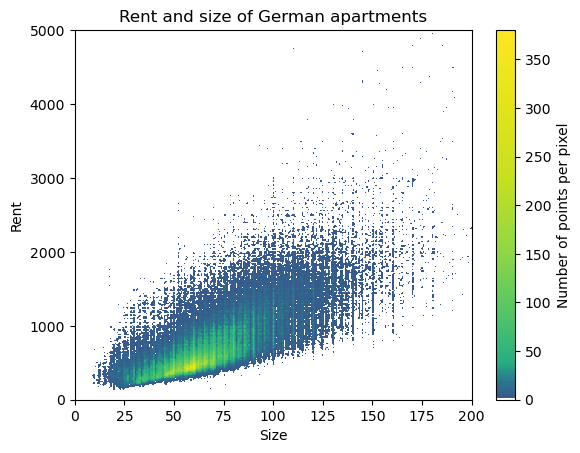

In [17]:
# "Viridis-like" colormap with white background
# colors are customizable
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#39568cff'),
    (0.01, '#365d8dff'),
    (0.05, '#2a788e'),
    (0.1, '#27ad81ff'),    
    (0.2, '#47c16eff'),
    (0.4, '#8fd744ff'),
    (0.6, '#c7e020ff'),
    (0.8, '#e3e418ff'),
    (1, '#fde725ff'),
], N=256)

# specify data to plot here
x = df['livingSpace']
y = df['totalRent']

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x, y)
# Set the range of x-axis
plt.xlim(0, 200)
plt.ylim(0, 5000)

# Add title and axis names
plt.title('Rent and size of German apartments')
plt.xlabel('Size')
plt.ylabel('Rent')

plt.show()


In [18]:
bigcity = df.loc[df['cluster'] == 'bigcity']
upscale = df.loc[df['cluster'] == 'upscale']
midlow = df.loc[df['cluster'] == 'midlow']
budget = df.loc[df['cluster'] == 'budget']
midhigh = df.loc[df['cluster'] == 'midhigh']

## 02a. Rent and size for big city cluster

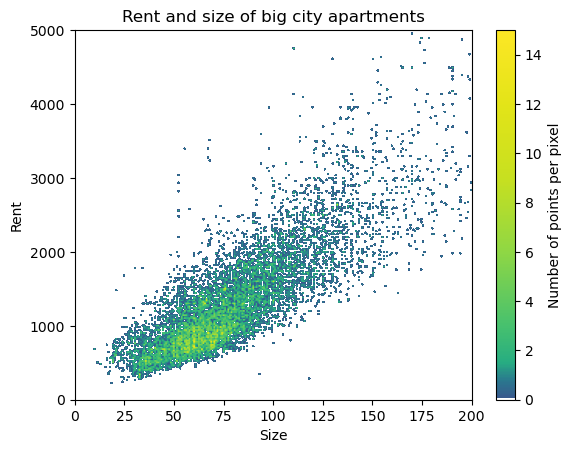

In [19]:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#39568cff'),
    (0.01, '#365d8dff'),
    (0.05, '#2a788e'),
    (0.1, '#27ad81ff'),    
    (0.2, '#47c16eff'),
    (0.4, '#8fd744ff'),
    (0.6, '#c7e020ff'),
    (0.8, '#e3e418ff'),
    (1, '#fde725ff'),
], N=256)

x2 = bigcity['livingSpace']
y2 = bigcity['totalRent']

def using_mpl_scatter_density(fig, x2, y2):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x2, y2, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x2, y2)
# Set the range of x-axis
plt.xlim(0, 200)
plt.ylim(0, 5000)

# Add title and axis names
plt.title('Rent and size of big city apartments')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.show()


## 02b. Rent and size for budget cluster

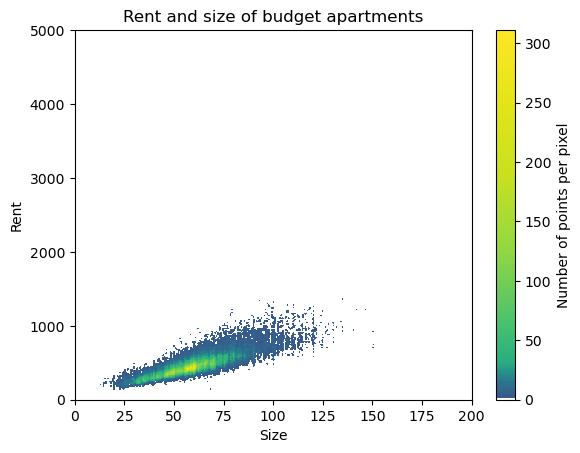

In [20]:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#39568cff'),
    (0.01, '#365d8dff'),
    (0.05, '#2a788e'),
    (0.1, '#27ad81ff'),    
    (0.2, '#47c16eff'),
    (0.4, '#8fd744ff'),
    (0.6, '#c7e020ff'),
    (0.8, '#e3e418ff'),
    (1, '#fde725ff'),
], N=256)

x3 = budget['livingSpace']
y3 = budget['totalRent']


def using_mpl_scatter_density(fig, x3, y3):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x3, y3, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x3, y3)
# Set the range of x-axis
plt.xlim(0, 200)
plt.ylim(0, 5000)

# Add title and axis names
plt.title('Rent and size of budget apartments')
plt.xlabel('Size')
plt.ylabel('Rent')

plt.show()


## 02c. Rent and size for upscale cluster

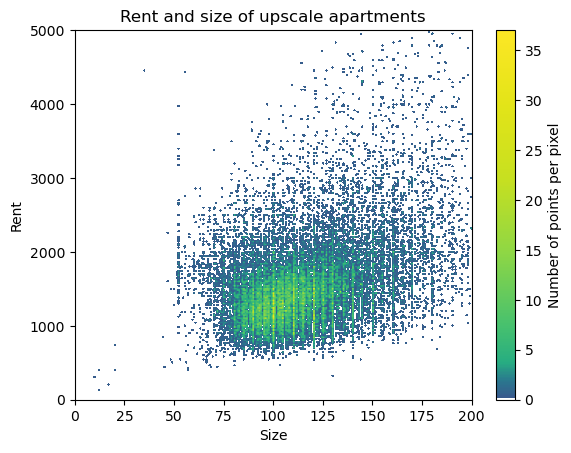

In [21]:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#39568cff'),
    (0.01, '#365d8dff'),
    (0.05, '#2a788e'),
    (0.1, '#27ad81ff'),    
    (0.2, '#47c16eff'),
    (0.4, '#8fd744ff'),
    (0.6, '#c7e020ff'),
    (0.8, '#e3e418ff'),
    (1, '#fde725ff'),
], N=256)

x3a = upscale['livingSpace']
y3a = upscale['totalRent']

def using_mpl_scatter_density(fig, x3a, y3a):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x3a, y3a, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x3a, y3a)
# Set the range of x-axis
plt.xlim(0, 200)
plt.ylim(0, 5000)

# Add title and axis names
plt.title('Rent and size of upscale apartments')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.show()


## 02d. Rent and size for midhigh cluster

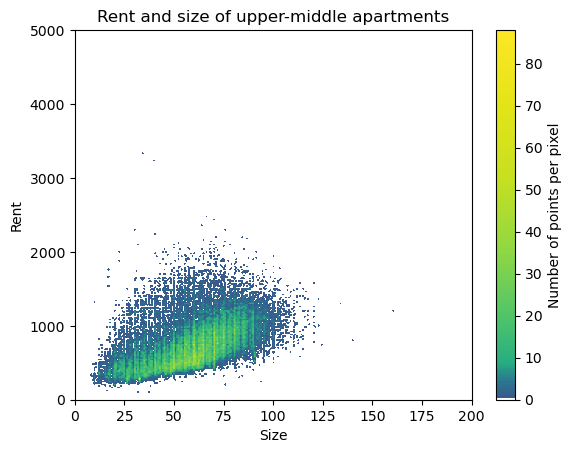

In [22]:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#39568cff'),
    (0.01, '#365d8dff'),
    (0.05, '#2a788e'),
    (0.1, '#27ad81ff'),    
    (0.2, '#47c16eff'),
    (0.4, '#8fd744ff'),
    (0.6, '#c7e020ff'),
    (0.8, '#e3e418ff'),
    (1, '#fde725ff'),
], N=256)

x3b = midhigh['livingSpace']
y3b = midhigh['totalRent']

def using_mpl_scatter_density(fig, x3b, y3b):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x3b, y3b, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x3b, y3b)
# Set the range of x-axis
plt.xlim(0, 200)
plt.ylim(0, 5000)

# Add title and axis names
plt.title('Rent and size of upper-middle apartments')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.show()


## 02e. Rent and size for midlow cluster

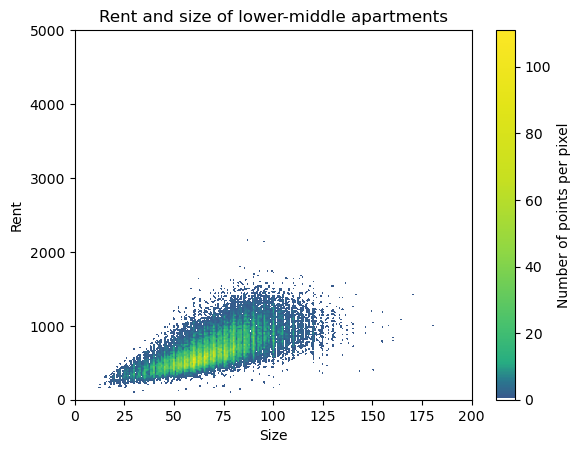

In [23]:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#39568cff'),
    (0.01, '#365d8dff'),
    (0.05, '#2a788e'),
    (0.1, '#27ad81ff'),    
    (0.2, '#47c16eff'),
    (0.4, '#8fd744ff'),
    (0.6, '#c7e020ff'),
    (0.8, '#e3e418ff'),
    (1, '#fde725ff'),
], N=256)

x3c = midlow['livingSpace']
y3c = midlow['totalRent']

def using_mpl_scatter_density(fig, x3c, y3c):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x3c, y3c, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x3c, y3c)
# Set the range of x-axis
plt.xlim(0, 200)
plt.ylim(0, 5000)

# Add title and axis names
plt.title('Rent and size of lower-middle apartments')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.show()


# 03. District population growth and rent

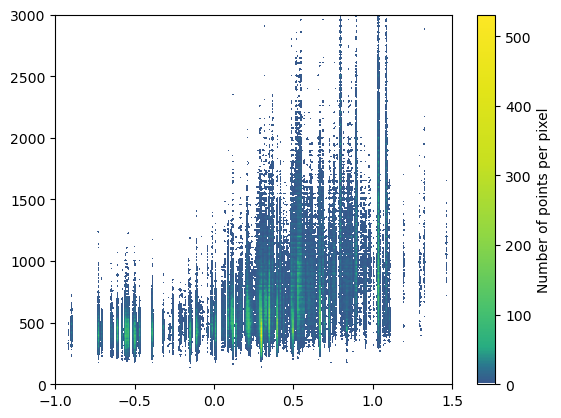

In [24]:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#39568cff'),
    (0.01, '#365d8dff'),
    (0.05, '#2a788e'),
    (0.1, '#27ad81ff'),    
    (0.2, '#47c16eff'),
    (0.4, '#8fd744ff'),
    (0.6, '#c7e020ff'),
    (0.8, '#e3e418ff'),
    (1, '#fde725ff'),
], N=256)

x4 = df['districtPopTrend']
y4 = df['totalRent']

def using_mpl_scatter_density(fig, x4, y4):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x4, y4, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x4, y4)
# Set the range of x-axis
plt.xlim(-1, 1.5)
plt.ylim(0, 3000)
plt.show()


# 04. District population growth and median rent (aggregated)

This is similar to the plot above, but I wanted to see if the relationship between district population growth and rent would be clearer if I plotted each district's median rent + population growth rate rather than plotting every unit's rent individually.

In [25]:
# Import rent data
median_rents = pd.read_csv(os.path.join(path, '02 data', 'cleaned data', 'median rents.csv'), index_col = False)
district_pop = pd.read_csv(os.path.join(path, '02 data', 'cleaned data', 'district_pop.csv'), index_col = False)

In [26]:
median_rents.shape

(400, 2)

In [27]:
district_pop.shape

(400, 3)

In [28]:
df_merge = district_pop.merge(median_rents, on = 'regio2', indicator = True)

In [29]:
df_merge.head()

,regio2,districtPopTrend,districtPop,totalRent,_merge
0,Aachen,0.35,555465,780.2,both
1,Aachen_Kreis,0.35,555465,725.0,both
2,Ahrweiler_Kreis,0.18,129727,770.0,both
3,Aichach_Friedberg_Kreis,0.75,133596,1059.0,both
4,Alb_Donau_Kreis,0.83,196047,915.0,both


In [30]:
# copying this to a csv so I can recreate it in Tableau
df_merge.to_clipboard()

In [65]:
# view correlations -- promising correlation between population trend and median rent.
df_merge.corr()

C:\Users\jacym\AppData\Local\Temp\ipykernel_17080\1139042121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merge.corr()


,districtPopTrend,districtPop,totalRent
districtPopTrend,1.000000,0.142158,0.608854
districtPop,0.142158,1.000000,0.253105
totalRent,0.608854,0.253105,1.000000


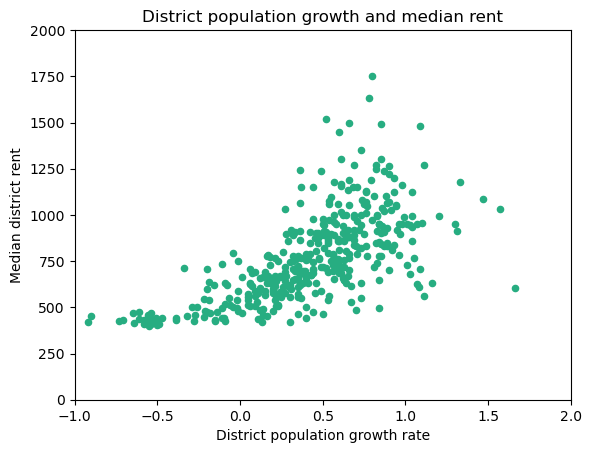

In [64]:
plt.scatter(x5, y5, s=20, c = '#27ad81ff' )
plt.xlim(-1, 2)
plt.ylim(0, 2000)
# Add title and axis names
plt.title('District population growth and median rent')
plt.xlabel('District population growth rate')
plt.ylabel('Median district rent')
plt.show()

plt.show()

This chart shows a solid positive correlation between population growth and median rent. Aggregating the data removed a lot of the noise.

# 05. Using density scatters to analyze other potential correlations

I wanted to use density scatterplots to take a closer look at a few potential relationships that looked unclear in simple scatterplots. The findings show that the relationships aren't very strong; there's way too much variability.

## 05a. Year and unit price

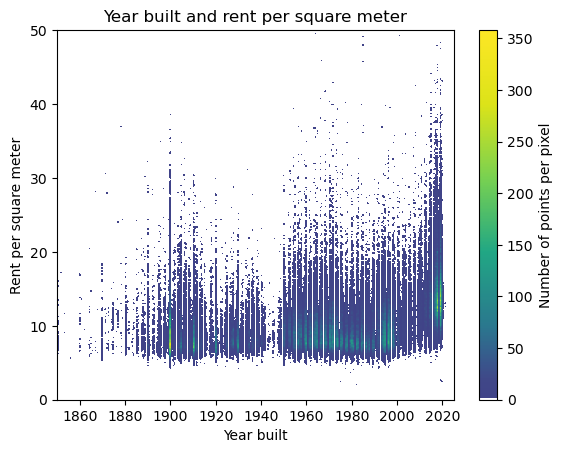

In [68]:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#404388'),
    (0.05, '#404788ff'),
    (0.1, '#39568cff'),    
    (0.2, '#2a788e'),
    (0.4, '#21a784'),
    (0.6, '#78d151'),
    (0.8, '#dce319ff'),
    (1, '#fde725ff'),
], N=256)

x6 = df['yearConstructed']
y6 = df['price/unit']

def using_mpl_scatter_density(fig, x6, y6):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x6, y6, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x6, y6)
# Set the range of x-axis
plt.xlim(1850, 2025)
plt.ylim(0, 50)

# Add title and axis names
plt.title('Year built and rent per square meter')
plt.xlabel('Year built')
plt.ylabel('Rent per square meter')

plt.show()

## 05b. Year and total rent

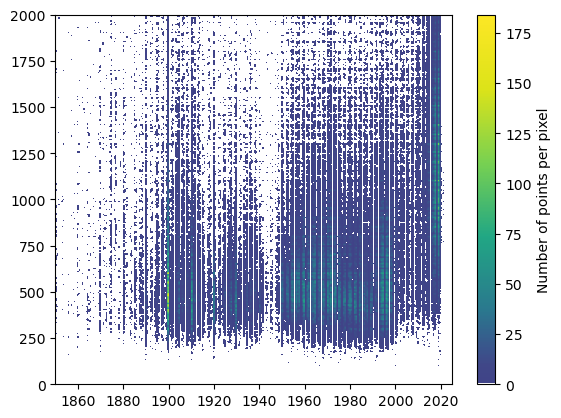

In [67]:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#404388'),
    (0.05, '#404788ff'),
    (0.1, '#39568cff'),    
    (0.2, '#2a788e'),
    (0.4, '#21a784'),
    (0.6, '#78d151'),
    (0.8, '#dce319ff'),
    (1, '#fde725ff'),
], N=256)

x_year = df['yearConstructed']
y_year = df['totalRent']

def using_mpl_scatter_density(fig, x_year, y_year):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x_year, y_year, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x_year, y_year)
# Set the range of x-axis
plt.xlim(1850, 2025)
plt.ylim(0, 2000)
plt.show()

## 05c. Picturecount and unit price

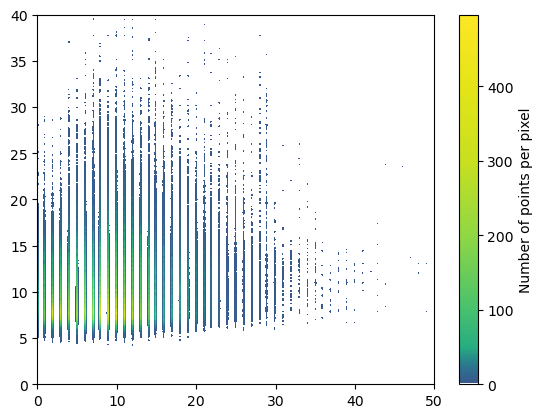

In [37]:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#39568cff'),
    (0.01, '#365d8dff'),
    (0.05, '#2a788e'),
    (0.1, '#27ad81ff'),    
    (0.2, '#47c16eff'),
    (0.4, '#8fd744ff'),
    (0.6, '#c7e020ff'),
    (0.8, '#e3e418ff'),
    (1, '#fde725ff'),
], N=256)

x7 = df['picturecount']
y7 = df['price/unit']

def using_mpl_scatter_density(fig, x7, y7):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x7, y7, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x7, y7)
# Set the range of x-axis
plt.xlim(0, 50)
plt.ylim(0, 40)
plt.show()


## 05d. Picturecount and totalRent

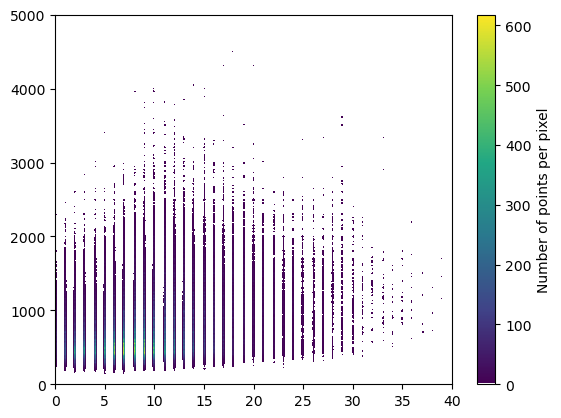

In [20]:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

x8 = df['picturecount']
y8 = df['totalRent']

def using_mpl_scatter_density(fig, x8, y8):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x8, y8, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x8, y8)
# Set the range of x-axis
plt.xlim(0, 40)
plt.ylim(0, 5000)
plt.show()
